# canvas
Example of primitives in a canvas.
One of the first actions in a ROOT session is the creation of a Canvas.
Here we create a Canvas named "c1".

After having executed this macro, try now to point on any object on the
screen: pad, text, lines, etc.

When the cursor points to sensitive areas in an object, the cursor
shape changes and suggests the type of action that can be applied.

For example:
 - One can move, grow,shrink a pad.
 - A text can be moved.
 - A line can be moved or its end points can be modified.
 - One can move, grow and shrink PaveLabels and PavesText.

Point to an object and click the right mouse button to change attributes.
Try to change the canvas size.

In the canvas "File" menu, select the option "Print" to produce
a PostScript file with a copy of the canvas.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, May 13, 2024 at 11:27 AM.</small></i>

In [1]:
 TCanvas *c1 = new TCanvas("c1","Canvas Example",200,10,600,480);

 gBenchmark->Start("canvas");

Inside this canvas, we create two pads

In [2]:
 TPad *pad1 = new TPad("pad1","This is pad1",0.05,0.52,0.95,0.97);
 TPad *pad2 = new TPad("pad2","This is pad2",0.05,0.02,0.95,0.47);
 pad1->SetFillColor(11);
 pad2->SetFillColor(11);
 pad1->Draw();
 pad2->Draw();

A pad may contain other pads and graphics objects.
We set the current pad to pad2.
Note that the current pad is always highlighted.

In [3]:
 pad2->cd();
 TPad *pad21 = new TPad("pad21","First subpad of pad2",0.02,0.05,0.48,0.95,17,3);
 TPad *pad22 = new TPad("pad22","Second subpad of pad2",0.52,0.05,0.98,0.95,17,3);
 pad21->Draw();
 pad22->Draw();

We enter some primitives in the created pads and set some attributes

In [4]:
 pad1->cd();
 float xt1 = 0.5;
 float yt1 = 0.1;
 TText *t1 = new TText(0.5,yt1,"ROOT");
 t1->SetTextAlign(22);
 t1->SetTextSize(0.05);
 t1->Draw();
 TLine *line1 = new TLine(0.05,0.05,0.80,0.70);
 line1->SetLineWidth(8);
 line1->SetLineColor(2);
 line1->Draw();
 line1->DrawLine(0.6,0.1,0.9,0.9);
 TLine *line2 = new TLine(0.05,0.70,0.50,0.10);
 line2->SetLineWidth(4);
 line2->SetLineColor(5);
 line2->Draw();

 pad21->cd();
 TText *t21 = new TText(0.05,0.8,"This is pad21");
 t21->SetTextSize(0.1);
 t21->Draw();
 float xp2 = 0.5;
 float yp2 = 0.4;
 TPavesText *paves = new TPavesText(0.1,0.1,xp2,yp2);
 paves->AddText("This is a PavesText");
 paves->AddText("You can add new lines");
 paves->AddText("Text formatting is automatic");
 paves->SetFillColor(43);
 paves->Draw();
 pad22->cd();
 TText *t22 = new TText(0.05,0.8,"This is pad22");
 t22->SetTextSize(0.1);
 t22->Draw();
 float xlc = 0.01;
 float ylc = 0.01;
 TPaveLabel *label = new TPaveLabel(xlc, ylc, xlc+0.8, ylc+0.1,"This is a PaveLabel");
 label->SetFillColor(24);
 label->Draw();

Modify object attributes in a loop

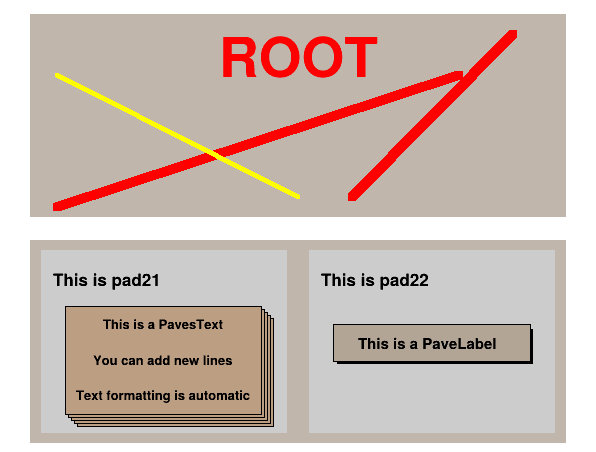

canvas    : Real Time =   1.54 seconds Cpu Time =   0.87 seconds


In [5]:
 Int_t nloops = 50;
 float dxp2   = (0.9-xp2)/nloops;
 float dyp2   = (0.7-yp2)/nloops;
 float dxlc   = (0.1-xlc)/nloops;
 float dylc   = (0.4-xlc)/nloops;
 float dxt1   = (0.5-xt1)/nloops;
 float dyt1   = (0.8-yt1)/nloops;
 float t10    = t1->GetTextSize();
 float t1end  = 0.3;
 float t1ds   = (t1end - t10)/nloops;
 Int_t color  = 0;
 for (int i=0;i<nloops;i++) {
    color++;
    color %= 8;
    line1->SetLineColor(color);
    t1->SetTextSize(t10 + t1ds*i);
    t1->SetTextColor(color);
    t1->SetX(xt1+dxt1*i);
    t1->SetY(yt1+dyt1*i);
    pad1->Modified();
    paves->SetX2NDC(xp2+dxp2*i);
    paves->SetY2NDC(yp2+dyp2*i);
    pad21->Modified();
    label->SetX1NDC(xlc+dxlc*i);
    label->SetY1NDC(ylc+dylc*i);
    label->SetX2NDC(xlc+dxlc*i+0.8);
    label->SetY2NDC(ylc+dylc*i+0.2);
    pad22->Modified();
    c1->Update();
 }
gBenchmark->Show("canvas");

Draw all canvases 

In [6]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()